<a href="https://colab.research.google.com/github/tl614-rutgers/gisTest/blob/main/ps2_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### My Plan
I plan on doing my research on covid-19 within NJ counties seeing which area had the most deaths and seeing which counties had the most hospitalizations related to covid and how it relates to the population density. I plan to provide further research in seeing how people were affected by covid relating to racial ethnic groups.

Data Sources:

https://data.cdc.gov/Public-Health-Surveillance/United-States-COVID-19-Community-Levels-by-County/3nnm-4jni/data hospitalization data

https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/new-jersey/ covid deaths data

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwi-h9WmqMuBAxXAlWoFHVG7CPIQFnoECBYQAQ&url=https%3A%2F%2Fwww.nj.gov%2Flabor%2Flabormarketinformation%2Fassets%2FPDFs%2Fdmograph%2Fest%2Fmcd%2Fdensity.xlsx&usg=AOvVaw2WUNow4omLDOveDVwJYnAc&opi=89978449 population density data of 2020

https://www.nj.com/data/2021/02/where-are-nj-residents-getting-vaccinated-the-most-see-every-county-from-best-to-worst.html vaccination

https://worldpopulationreview.com/states/new-jersey/counties

https://njogis-newjersey.opendata.arcgis.com/datasets/newjersey::municipal-boundaries-of-nj/explore?showTable=true

In [2]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
!pip install mapclassify
import mapclassify

## shapefile data and population density for 2020

In [20]:
! wget -q -O bounds_nj_shp.zip https://docs.google.com/uc?id=1GUI-JMkom1XFGaa0k77C1JmlEVH6Eenu&export=download
zip_ref = zipfile.ZipFile('bounds_nj_shp.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njc=gpd.read_file('nj_counties.shp')

<Axes: >

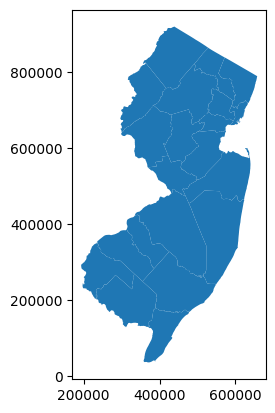

In [21]:
njc.plot()

In [22]:
njc.dtypes

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [23]:
njc.head(5)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,395066,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.690 491361.780, 436701.190 49..."
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,532498,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.990 423475.830, 342804.100 42..."
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,95089,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.730 177065.130, 390410.170 17..."


In [24]:
! wget -q -O Municipal_Boundaries_of_NJ.zip https://docs.google.com/uc?id=1jJg-in1qxx-lSO6TD_hCQl0CZ6ngw_8h&export=download
zip_ref = zipfile.ZipFile('Municipal_Boundaries_of_NJ.zip', 'r'); zip_ref.extractall(); zip_ref.close()
municipal=gpd.read_file('Municipal_Boundaries_of_NJ.shp')
municipal.dtypes
municipal.head(5)

OBJECTID         int64
MUN             object
COUNTY          object
MUN_LABEL       object
MUN_TYPE        object
NAME            object
GNIS_NAME       object
GNIS            object
SSN             object
MUN_CODE        object
CENSUS2020      object
CENSUS2010     float64
ACRES          float64
SQ_MILES       float64
POP2020          int64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2020       int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

,OBJECTID,MUN,COUNTY,MUN_LABEL,MUN_TYPE,NAME,GNIS_NAME,GNIS,SSN,MUN_CODE,...,POP1990,POP1980,POPDEN2020,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,Shape_Leng,Shape_Area,geometry
0,1,DEERFIELD TWP,CUMBERLAND,Deerfield Township,Township,Deerfield Township,Township of Deerfield,882054,0603,0603,...,2933,2523,186,185,173,174,149,99759.458856,4.705406e+08,"POLYGON ((319452.812 234664.937, 319964.094 23..."
1,2,HOPEWELL TWP,CUMBERLAND,Hopewell Township,Township,Hopewell Township,Township of Hopewell,882056,0607,0607,...,4215,4365,142,148,144,136,141,194514.875121,8.612620e+08,"POLYGON ((284499.779 224260.770, 284482.610 22..."
2,3,BUENA BORO,ATLANTIC,Buena Borough,Borough,Buena Borough,Borough of Buena,885173,0104,0104,...,4441,3642,594,608,512,587,481,65896.479506,2.110826e+08,"POLYGON ((371070.130 261075.943, 371071.056 26..."
3,4,PORT REPUBLIC CITY,ATLANTIC,Port Republic City,City,Port Republic,City of Port Republic,885360,0120,0120,...,992,837,129,130,121,116,98,91149.091766,2.385132e+08,"POLYGON ((508544.690 258335.230, 507170.590 25..."
4,5,LOWER ALLOWAYS CREEK TWP,SALEM,Lower Alloways Creek Township,Township,Lower Alloways Creek Township,Township of Lower Alloways Creek,882065,1704,1705,...,1858,1547,36,37,39,39,32,272851.442614,1.336418e+09,"POLYGON ((223478.221 254012.865, 223489.850 25..."


In [25]:
muni = municipal[['COUNTY', 'MUN', 'POPDEN2020']]
muni.sort_values(by='COUNTY', inplace=True)
muni

<ipython-input-25-f307e7137583>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muni.sort_values(by='COUNTY', inplace=True)


,COUNTY,MUN,POPDEN2020
37,ATLANTIC,ATLANTIC CITY,2420
44,ATLANTIC,BRIGANTINE CITY,721
28,ATLANTIC,LONGPORT BORO,1503
42,ATLANTIC,ESTELL MANOR CITY,30
39,ATLANTIC,WEYMOUTH TWP,215
...,...,...,...
442,WARREN,FRELINGHUYSEN TWP,92
299,WARREN,GREENWICH TWP,517
315,WARREN,POHATCONG TWP,236
353,WARREN,WASHINGTON TWP,360


In [26]:
muniAgg = muni.groupby('COUNTY').agg('sum')
muniAgg

<ipython-input-26-28c150f6389f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  muniAgg = muni.groupby('COUNTY').agg('sum')


,POPDEN2020
COUNTY,
ATLANTIC,25115
BERGEN,386735
BURLINGTON,66048
CAMDEN,142798
CAPE MAY,14795
CUMBERLAND,7187
ESSEX,154650
GLOUCESTER,39692
HUDSON,323467


In [27]:
njmuni0=gpd.read_file('Municipal_Boundaries_of_NJ.shp')
njmuni=njmuni0[['COUNTY', 'MUN','POPDEN2020','SQ_MILES','geometry']]

<Axes: >

<Axes: >

[]

[]

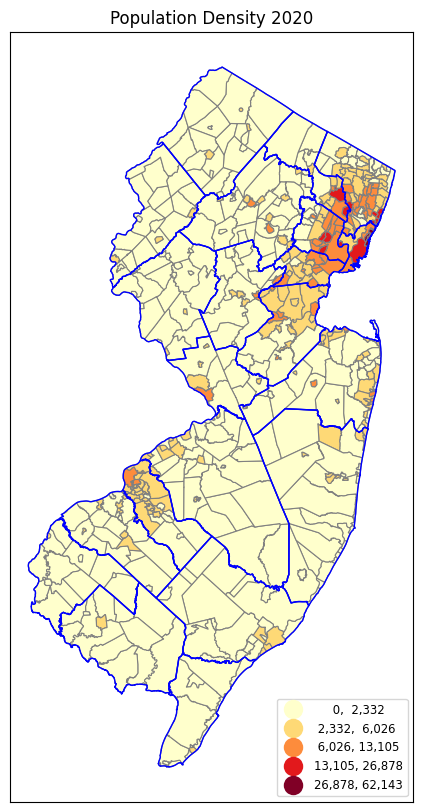

In [100]:
fig, ax = plt.subplots(1, figsize=(6,10))
njmuni.plot(ax=ax,column='POPDEN2020',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.8,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
njc.plot(ax=ax, edgecolor='blue', linewidth=1, facecolor='none')
ax.title.set_text("Population Density 2020")
ax.set_xticks([]); ax.set_yticks([])

## first dataset showing the amount of deaths in each county on august 11, 2022

In [29]:
! wget -q -O covid_deaths_usafacts.csv https://raw.githubusercontent.com/tl614-rutgers/gisTest/main/covid_deaths_usafacts.csv
nj_deaths = pd.read_csv('covid_deaths_usafacts.csv')
deaths = nj_deaths.loc[nj_deaths['State'] == 'NJ']
deaths.head(5)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
1804,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1805,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073
1806,34003,Bergen County,NJ,34,0,0,0,0,0,0,...,3708,3708,3708,3708,3708,3708,3708,3708,3708,3708
1807,34005,Burlington County,NJ,34,0,0,0,0,0,0,...,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
1808,34007,Camden County,NJ,34,0,0,0,0,0,0,...,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959


In [30]:
deaths.dtypes

countyFIPS      int64
County Name    object
State          object
StateFIPS       int64
2020-01-22      int64
                ...  
2023-07-19      int64
2023-07-20      int64
2023-07-21      int64
2023-07-22      int64
2023-07-23      int64
Length: 1269, dtype: object

In [31]:
deaths1 = deaths[['County Name', '2022-08-11']]
deaths1.rename(columns={'County Name': 'county'}, inplace=True)
deaths1.rename(columns={'2022-08-11': 'aug 11, 2022'}, inplace=True)
deaths1

<ipython-input-31-b0bb25162ead>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths1.rename(columns={'County Name': 'county'}, inplace=True)
<ipython-input-31-b0bb25162ead>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths1.rename(columns={'2022-08-11': 'aug 11, 2022'}, inplace=True)


,county,"aug 11, 2022"
1804,Statewide Unallocated,0
1805,Atlantic County,1033
1806,Bergen County,3533
1807,Burlington County,1275
1808,Camden County,1875
1809,Cape May County,318
1810,Cumberland County,625
1811,Essex County,3658
1812,Gloucester County,996
1813,Hudson County,2758


In [32]:
deaths2 = deaths1.iloc[1:, :]
deaths2

,county,"aug 11, 2022"
1805,Atlantic County,1033
1806,Bergen County,3533
1807,Burlington County,1275
1808,Camden County,1875
1809,Cape May County,318
1810,Cumberland County,625
1811,Essex County,3658
1812,Gloucester County,996
1813,Hudson County,2758
1814,Hunterdon County,283


In [33]:
deaths2['county'] = deaths2.county.str.replace('County ', 'County')
njd = deaths2
njd

<ipython-input-33-b376a3ff15ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths2['county'] = deaths2.county.str.replace('County ', 'County')


,county,"aug 11, 2022"
1805,Atlantic County,1033
1806,Bergen County,3533
1807,Burlington County,1275
1808,Camden County,1875
1809,Cape May County,318
1810,Cumberland County,625
1811,Essex County,3658
1812,Gloucester County,996
1813,Hudson County,2758
1814,Hunterdon County,283


In [34]:
njc1 = pd.merge(njc, njd, left_on='COUNTY_LAB', right_on='county', how='outer', indicator=True)
njc1[['COUNTY_LAB', 'aug 11, 2022', '_merge']]
njc2 = pd.merge(njc, njd, left_on='COUNTY_LAB', right_on='county', how='outer', indicator=False)

,COUNTY_LAB,"aug 11, 2022",_merge
0,Atlantic County,1033,both
1,Bergen County,3533,both
2,Burlington County,1275,both
3,Camden County,1875,both
4,Cape May County,318,both
5,Cumberland County,625,both
6,Essex County,3658,both
7,Gloucester County,996,both
8,Hudson County,2758,both
9,Hunterdon County,283,both


<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/new-jersey/')

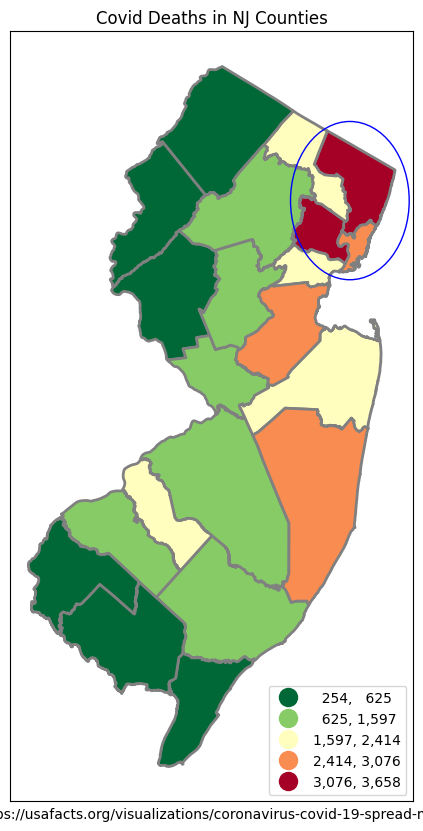

In [64]:
fig, ax = plt.subplots(1, figsize=(6,10))
njc2.plot(ax=ax,column='aug 11, 2022',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
ax.title.set_text("Covid Deaths in NJ Counties")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/new-jersey/''')

from matplotlib.patches import Ellipse
e1 = Ellipse(xy=(600000, 750000), width=150000, height=200000, edgecolor='b', fc='None', lw=1)
ax.add_patch(e1)

#bergen county and essex county had the most deaths

## second dataset showing the hospitalizations on august 11, 2022

In [65]:
!wget -q -O United_States_COVID-19_Community_Levels_by_County.csv https://raw.githubusercontent.com/tl614-rutgers/gisTest/main/United_States_COVID-19_Community_Levels_by_County.csv
hosp_admit = pd.read_csv('United_States_COVID-19_Community_Levels_by_County.csv')
admissions = hosp_admit.loc[hosp_admit['date_updated'] == '8/11/22']
admissions.head(5)

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated
16,Cape May,34009,New Jersey,92039,64,"Atlantic (Atlantic City), NJ - Cape May, NJ",355709,5.0,27.3,272.71,High,8/11/22
17,Hunterdon,34019,New Jersey,124371,93,"Hunterdon, NJ - Warren (Phillipsburg), NJ",229638,3.3,10.0,176.09,Medium,8/11/22
18,Monmouth,34025,New Jersey,618795,108,"Monmouth, NJ - Ocean (Brick Township), NJ",1225981,6.5,16.5,234.00,High,8/11/22
19,Salem,34033,New Jersey,62385,23,"Camden (Camden), NJ - Burlington, NJ",1305841,6.0,17.5,203.57,High,8/11/22
20,Warren,34041,New Jersey,105267,93,"Hunterdon, NJ - Warren (Phillipsburg), NJ",229638,3.3,10.0,164.34,Medium,8/11/22


In [66]:
!wget -q -O United_States_COVID-19_Community_Levels_by_County.csv https://raw.githubusercontent.com/tl614-rutgers/gisTest/main/United_States_COVID-19_Community_Levels_by_County.csv
hosp_admit = pd.read_csv('United_States_COVID-19_Community_Levels_by_County.csv')
hospitalization = hosp_admit.loc[hosp_admit['date_updated'] == '8/11/22']
hospitalization.head(5)

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated
16,Cape May,34009,New Jersey,92039,64,"Atlantic (Atlantic City), NJ - Cape May, NJ",355709,5.0,27.3,272.71,High,8/11/22
17,Hunterdon,34019,New Jersey,124371,93,"Hunterdon, NJ - Warren (Phillipsburg), NJ",229638,3.3,10.0,176.09,Medium,8/11/22
18,Monmouth,34025,New Jersey,618795,108,"Monmouth, NJ - Ocean (Brick Township), NJ",1225981,6.5,16.5,234.00,High,8/11/22
19,Salem,34033,New Jersey,62385,23,"Camden (Camden), NJ - Burlington, NJ",1305841,6.0,17.5,203.57,High,8/11/22
20,Warren,34041,New Jersey,105267,93,"Hunterdon, NJ - Warren (Phillipsburg), NJ",229638,3.3,10.0,164.34,Medium,8/11/22


In [67]:
hospitalization.dtypes

county                                 object
county_fips                             int64
state                                  object
county_population                       int64
health_service_area_number              int64
health_service_area                    object
health_service_area_population          int64
covid_inpatient_bed_utilization       float64
covid_hospital_admissions_per_100k    float64
covid_cases_per_100k                  float64
covid-19_community_level               object
date_updated                           object
dtype: object

In [68]:
hosp1 = hospitalization[['county', 'covid_hospital_admissions_per_100k', 'date_updated']]
hosp1.rename(columns={'covid_hospital_admissions_per_100k': 'covid_hosp_admissions/100k'}, inplace=True)
hosp1

<ipython-input-68-f8d0f34b244b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosp1.rename(columns={'covid_hospital_admissions_per_100k': 'covid_hosp_admissions/100k'}, inplace=True)


,county,covid_hosp_admissions/100k,date_updated
16,Cape May,27.3,8/11/22
17,Hunterdon,10.0,8/11/22
18,Monmouth,16.5,8/11/22
19,Salem,17.5,8/11/22
20,Warren,10.0,8/11/22
21,Cumberland,0.0,8/11/22
22,Essex,11.4,8/11/22
23,Mercer,10.3,8/11/22
24,Middlesex,11.4,8/11/22
25,Passaic,11.3,8/11/22


In [69]:
hosp2=hosp1.iloc[0:, :]
hosp2

,county,covid_hosp_admissions/100k,date_updated
16,Cape May,27.3,8/11/22
17,Hunterdon,10.0,8/11/22
18,Monmouth,16.5,8/11/22
19,Salem,17.5,8/11/22
20,Warren,10.0,8/11/22
21,Cumberland,0.0,8/11/22
22,Essex,11.4,8/11/22
23,Mercer,10.3,8/11/22
24,Middlesex,11.4,8/11/22
25,Passaic,11.3,8/11/22


In [70]:
hosp2['COUNTY'] = hosp2['county'].str.upper().str.strip()
admissions = hosp2
admissions

<ipython-input-70-17a7194dcb45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hosp2['COUNTY'] = hosp2['county'].str.upper().str.strip()


,county,covid_hosp_admissions/100k,date_updated,COUNTY
16,Cape May,27.3,8/11/22,CAPE MAY
17,Hunterdon,10.0,8/11/22,HUNTERDON
18,Monmouth,16.5,8/11/22,MONMOUTH
19,Salem,17.5,8/11/22,SALEM
20,Warren,10.0,8/11/22,WARREN
21,Cumberland,0.0,8/11/22,CUMBERLAND
22,Essex,11.4,8/11/22,ESSEX
23,Mercer,10.3,8/11/22,MERCER
24,Middlesex,11.4,8/11/22,MIDDLESEX
25,Passaic,11.3,8/11/22,PASSAIC


In [71]:
njc3 = pd.merge(njc, admissions, on='COUNTY', how='outer', indicator=True)
njc3[['COUNTY', 'covid_hosp_admissions/100k', 'date_updated', '_merge']]
njc4 = pd.merge(njc, admissions, on='COUNTY', how='outer', indicator=False)

,COUNTY,covid_hosp_admissions/100k,date_updated,_merge
0,ATLANTIC,27.3,8/11/22,both
1,BERGEN,11.3,8/11/22,both
2,BURLINGTON,17.5,8/11/22,both
3,CAMDEN,17.5,8/11/22,both
4,CAPE MAY,27.3,8/11/22,both
5,CUMBERLAND,0.0,8/11/22,both
6,ESSEX,11.4,8/11/22,both
7,GLOUCESTER,17.5,8/11/22,both
8,HUDSON,11.3,8/11/22,both
9,HUNTERDON,10.0,8/11/22,both


<Axes: >

[]

[]

<Axes: >

[]

[]

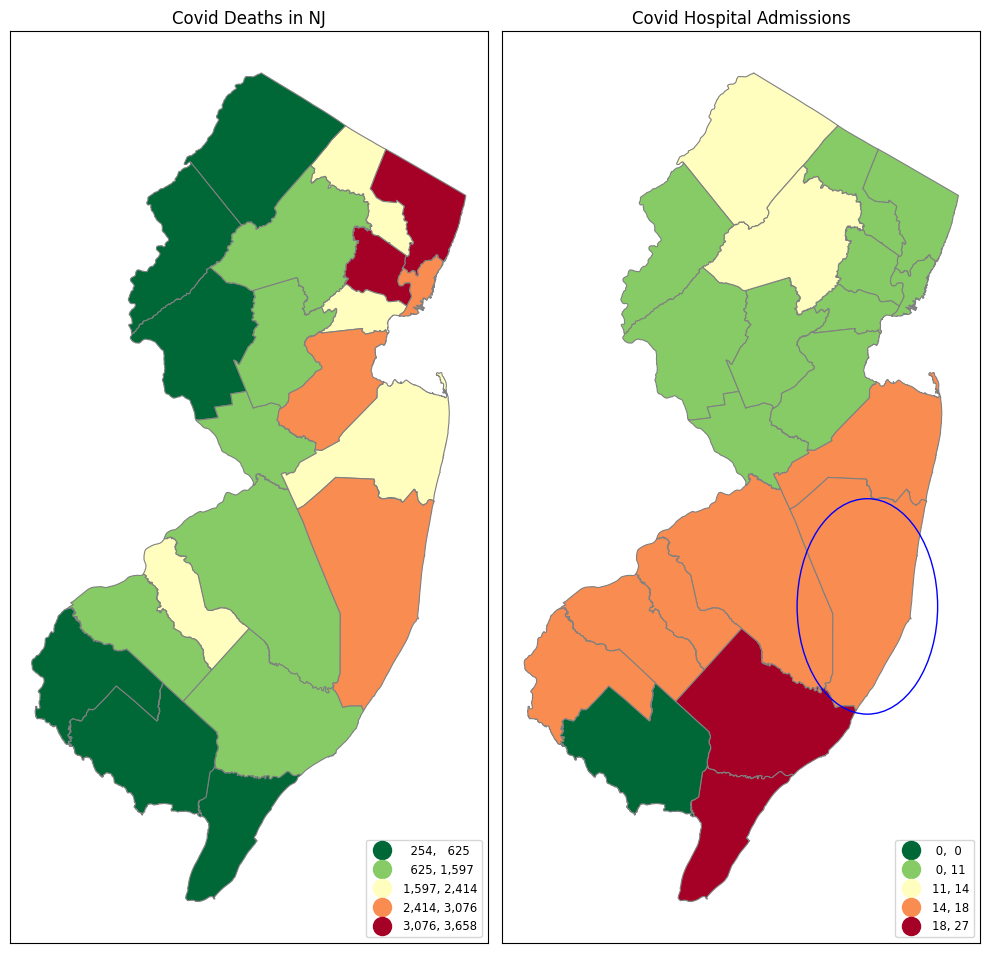

In [86]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True) #subplots(1 row, 2 columns for nj)
njc2.plot(ax=axs[0],column='aug 11, 2022',legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.8,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Covid Deaths in NJ")
axs[0].set_xticks([]); axs[0].set_yticks([])

njc3.plot(ax=axs[1],column='covid_hosp_admissions/100k',legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.8,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Covid Hospital Admissions")
axs[1].set_xticks([]); axs[1].set_yticks([])

from matplotlib.patches import Ellipse
e1 = Ellipse(xy=(560000, 350000), width=150000, height=230000, edgecolor='b', fc='None', lw=1)
axs[1].add_patch(e1)

#ocean county had the most deaths and hospital admissions on this day but compared to the population density, this county is less dense.

## vaccination datasets

In [87]:
! wget -q -O data-T9jw6.csv https://raw.githubusercontent.com/tl614-rutgers/gisTest/main/data-T9jw6.csv
vax = pd.read_csv('data-T9jw6.csv')
vax

,County,Total Cases,Total Deaths,Cases per 100K people,Deaths per 100K people,Vaccine doses administered per 100K people
0,Statewide,678306,20495,7637,231,17558
1,Atlantic,19058,523,7097,195,18384
2,Bergen,66074,2303,7105,248,18912
3,Burlington,29988,675,6718,151,17990
4,Camden,38484,1032,7585,203,17862
5,Cape May,3536,150,3774,160,24349
6,Cumberland,11742,328,7654,214,14525
7,Essex,65234,2368,8220,298,16249
8,Gloucester,20501,502,7049,173,19025
9,Hudson,61386,1788,9181,267,10633


In [88]:
vax.dtypes

County                                        object
Total Cases                                    int64
Total Deaths                                   int64
Cases per 100K people                          int64
Deaths per 100K people                         int64
Vaccine doses administered per 100K people     int64
dtype: object

In [89]:
vax1 = vax[['County', 'Vaccine doses administered per 100K people', 'Deaths per 100K people']]
vax1

,County,Vaccine doses administered per 100K people,Deaths per 100K people
0,Statewide,17558,231
1,Atlantic,18384,195
2,Bergen,18912,248
3,Burlington,17990,151
4,Camden,17862,203
5,Cape May,24349,160
6,Cumberland,14525,214
7,Essex,16249,298
8,Gloucester,19025,173
9,Hudson,10633,267


In [90]:
vax2 = vax1.iloc[1:, :]
vax2

,County,Vaccine doses administered per 100K people,Deaths per 100K people
1,Atlantic,18384,195
2,Bergen,18912,248
3,Burlington,17990,151
4,Camden,17862,203
5,Cape May,24349,160
6,Cumberland,14525,214
7,Essex,16249,298
8,Gloucester,19025,173
9,Hudson,10633,267
10,Hunterdon,16416,82


In [91]:
vax2['COUNTY'] = vax2['County'].str.upper()
vax_map = vax2
vax_map

<ipython-input-91-dbe3b8acf193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vax2['COUNTY'] = vax2['County'].str.upper()


,County,Vaccine doses administered per 100K people,Deaths per 100K people,COUNTY
1,Atlantic,18384,195,ATLANTIC
2,Bergen,18912,248,BERGEN
3,Burlington,17990,151,BURLINGTON
4,Camden,17862,203,CAMDEN
5,Cape May,24349,160,CAPE MAY
6,Cumberland,14525,214,CUMBERLAND
7,Essex,16249,298,ESSEX
8,Gloucester,19025,173,GLOUCESTER
9,Hudson,10633,267,HUDSON
10,Hunterdon,16416,82,HUNTERDON


In [92]:
vax_map = pd.merge(njc, vax2, on='COUNTY', how='outer', indicator=True)
vax_map[['County', 'Vaccine doses administered per 100K people', 'Deaths per 100K people', '_merge']]
vax_map = pd.merge(njc, vax2, on='COUNTY', how='outer', indicator=False)

,County,Vaccine doses administered per 100K people,Deaths per 100K people,_merge
0,Atlantic,18384,195,both
1,Bergen,18912,248,both
2,Burlington,17990,151,both
3,Camden,17862,203,both
4,Cape May,24349,160,both
5,Cumberland,14525,214,both
6,Essex,16249,298,both
7,Gloucester,19025,173,both
8,Hudson,10633,267,both
9,Hunterdon,16416,82,both


In [93]:
njC = vax_map.copy()
njC['geometry'] = njC['geometry'].centroid

<Axes: >

[]

[]

<Axes: title={'center': 'Vaccines Administered per 100K'}>

ValueError: ignored

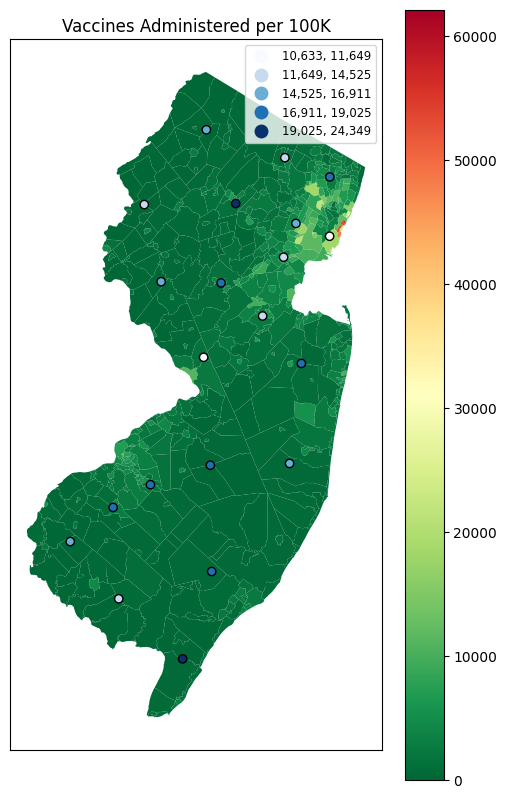

In [127]:
# fig, ax = plt.subplots(1, figsize=(6,10))
# njmuni.plot(ax=ax,column='POPDEN2020',legend=True,cmap='RdYlGn_r',
#           legend_kwds= {"fmt": "{:,.0f}",'markerscale':1.4})
# #current_handles, current_labels = plt.gca().get_legend_handles_labels()
# #reversed_handles = list(reversed(current_handles))
# #reversed_labels = list(reversed(current_labels))
# #plt.legend(reversed_handles,reversed_labels)

# l1 = ax.get_legend()
# l1.set_title('''density''')

# njC.plot(ax=ax,column='Vaccine doses administered per 100K people',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
#          edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
#         'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
#          markersize = 200)

# l2 = ax.get_legend()
# l2.set_title('''vaccinated''')

# ax.add_artist(l2)
# ax.add_artist(l1)

# ax.title.set_text("Vaccines Administered per 100K")
# ax.set_xticks([])
# ax.set_yticks([])

fig, ax = plt.subplots(1, figsize=(6,10))
njmuni.plot(ax=ax,column='POPDEN2020',legend=True,cmap='RdYlGn_r',
          legend_kwds= {"fmt": "{:,.0f}"})
l1 = ax.get_legend()
#l1.set_title('''density''')

ax.title.set_text("Vaccines Administered per 100K")
ax.set_xticks([])
ax.set_yticks([])

njC.plot(ax=ax,column='Vaccine doses administered per 100K people',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'title_fontsize':'medium','fontsize':'small'})
l2 = ax.legend(markerscale=1.4, loc='bottom left', title='vaccinated')
l2.set_title('''vaccinated''')

ax.add_artist(l2)
#ax.add_artist(l1)

ax.title.set_text("Vaccines Administered per 100K")
ax.set_xticks([])
ax.set_yticks([])

#morris county and cape may county had the most people vaccinated despite being less dense than other counties.
#bergen, hudson, and essex county are the most dense and they have the fewest number of vaccinations
